<a href="https://www.kaggle.com/code/milicaradisavljevic/medical-insurance-costs?scriptVersionId=188663865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the data

The dataset that will be used is Kaggle's "Medical Cost Personal Datasets". It contains informations about insured persons and the costs that the insurance company spends on that person. Costs are affected by age, gender, BMI, whether the person is a smoker, etc. The database contains 1338 persons.

Dataset link: https://www.kaggle.com/datasets/mirichoi0218/insurance

Key attributes:
- age: age of a insured person;
- sex: sex of a insured person(male/female);
- bmi: body mass index;
- children: number of childrens covered by helth insurance;
- smoker;
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest;
- charges: medical costs billed by health insurance on insured person.


# Objectives

- Exploratory Data Analysis;
- Hypothesis testing;
- Regression models: predicting medical insurance costs for a new potential insured based on his attributes. I trained Linear Regression, Random Forest and Ridge Regression models and compared their results.

# Import Libraries

In [1]:
pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import skillsnetwork

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency, boxcox, normaltest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

In [3]:
import warnings 
warnings.filterwarnings('ignore')

# Load the data

In [4]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 entries and 7 columns. We have 3 categorical columns and 4 numerical columns. Also, we dont have null values.

In [6]:
#checking if we have duplicates in dataset
data.duplicated().sum()

1

In [7]:
#removing duplicates
data = data.drop_duplicates()

In [8]:
data["age"].value_counts().head(10)

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: count, dtype: int64

sex
male      675
female    662
Name: count, dtype: int64

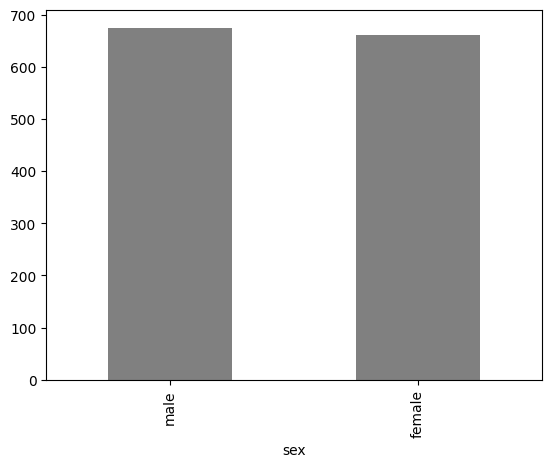

In [9]:
data["sex"].value_counts().plot.bar(color='gray')
data["sex"].value_counts()

We can see that the largest number of insured persons are 18 and 19 years old, a total of 136 of them. Also, the number of male and female persons is very similar.

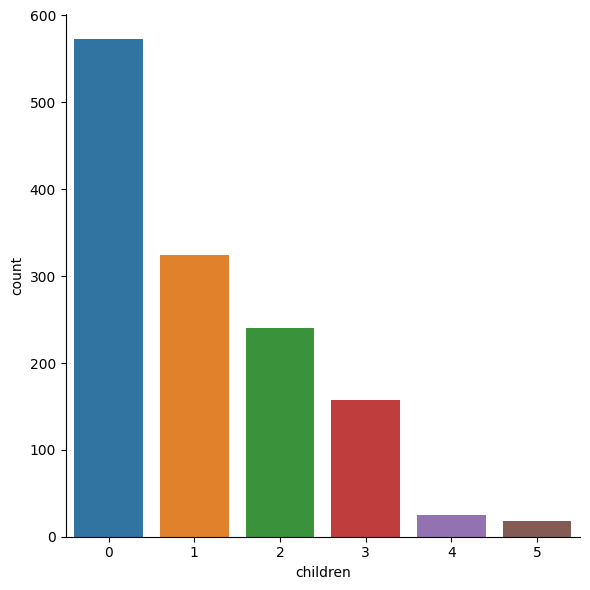

In [10]:
#plot number of children per person
sns.catplot(x="children", kind="count", data=data, height=6)

In [11]:
data['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

The largest number of users have no children, specifically 573 users. The least number of people have 4 or 5 children, a total of 43 of them.


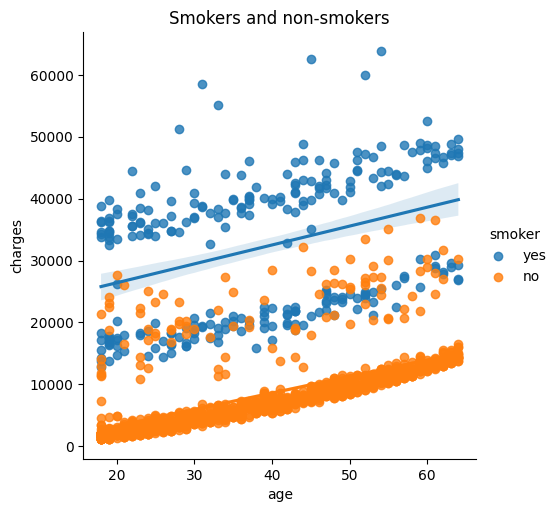

In [12]:
# Create the lmplot
lm = sns.lmplot(x="age", y="charges", hue="smoker", data=data)

# Set the title
lm.set(title='Smokers and non-smokers')

# Show the plot
plt.show()

From the plot we can see that medical costs increases with age, and this is the case and for smokers and non smokers. In the following, we will check whether there is a difference in medical costs between non smokers and smokers.


## Hypothesis testing

### H0: BMI is not different for men and women

#### Define hypothesis (H0, H1)

- mi_1 - population mean for males BMI;
- mi_2 - population mean for females BMI.

*Null hypothesis H0*: mi_1 - mi_2 = 0 (Male and female BMI are the same)

*Alternative hypothesis H1*: mi_1 - mi_2 ≠ 0 (Male and female BMI are different)

In [13]:
#female and male observations
female = data.loc[data.sex=="female"]
male = data.loc[data.sex=="male"]

In [14]:
#bmi for female and male
female_bmi = female.bmi
male_bmi = male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

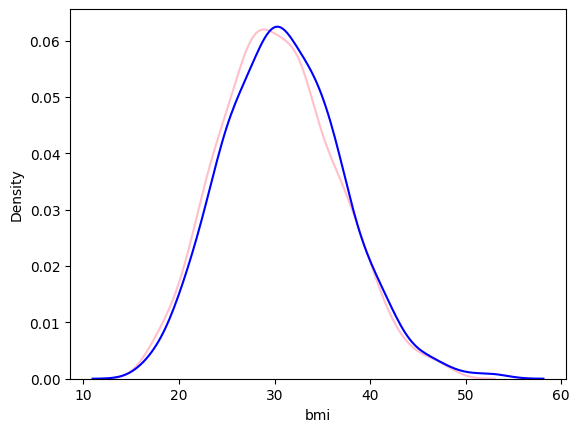

In [15]:
#plot bmi distributions
sns.distplot(female_bmi,color='pink',hist=False)
sns.distplot(male_bmi,color='blue',hist=False)

In [16]:
female.bmi.mean()

30.37774924471299

In [17]:
male.bmi.mean()

30.94365185185185

#### Decision criteria

When setting the criteria for a decision in a statistical test, we determine the level of significance, which is often set at 5%, 1%, or 0.5%. This level of significance helps us decide whether to accept the null hypothesis or reject it in favor of the alternative hypothesis.

In our task we will chose 5% significance level which is alpha = 0.05. Since we have 2-tailed test, we will divide alpha by 2. 

If calculated p-value is less than alpha, we will reject Null hypothesis.

In [18]:
alpha=0.05

#### Evaluation and results

A **t-test** is used to compare the means of 2 populations or 1 population with a standard. 
- when we do not know the standard deviation of the population;
- when we have a limited number of samples (less than 30).

A **Z-test** is used to compare the mean of 2 populations or 1 population with a standard. It is also used to compare the proportions of 2 populations or 1 population with a standard.
- it doesn't matter if we know the standard deviation or not;
- a large number of samples (more than 30).

An **f-test** is used to compare variances between 2 populations.
- any size;
- basis of ANOVA.

**Chi-squared test** is used to determine whether there's a statistically significant difference between the expected and observed frequencies in one or more categories of a contingency table. A contingency table is a way of organizing categorical data into rows and columns to show the frequency distribution of different variables. By comparing the observed frequencies with the expected ones, the chi-square test helps us understand if the differences are due to chance or if they indicate a meaningful relationship between the variables.

In [19]:
t_value1, p_value1 = stats.ttest_ind(male_bmi, female_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  1.6970672301298684 , p_value1 =  0.08991704324931137


p_value is bigger than 0.05, so we conclude that we can not reject null hypothesis and that there is no difference between female and male BMI.

### H0: Number of smokers are not different across the different regions

#### Define hypothesis (H0, H1)

*Null hypothesis H0*: Number of smokers are not different across the different regions

*Alternative hypothesis H1* - Number of smokers are different across the different regions

In [20]:
#calculate contigency table
contingency_table = pd.crosstab(data.region, data.smoker)
contingency_table

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

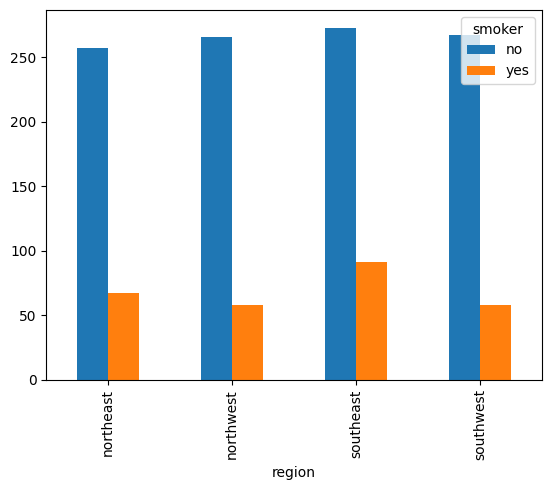

In [21]:
 contingency_table.plot(kind='bar')

#### Decision criteria

In [22]:
alpha = 0.05

#### Evaluation and results

In [23]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency_table, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.27790254132191 , p_value: 0.06354826573182334 , degree of freedom: 3 ,expected frequencies: [[257.60059835  66.39940165]
 [257.60059835  66.39940165]
 [289.40314136  74.59685864]
 [258.39566193  66.60433807]] 


P-value is higher tnan alpha, so we can conclude that number of smokers are not different across the different regions. Null hypothesis accepted.

### H1: People who smoke have higher medical costs

#### Define hypothesis (H0, H1)

- mi_1 - smokers;
- mi_2 - nonsmokers.

*Null hypothesis H0*: mi_1 ≤ mi_2 (People who smoke have less or the same medical costs as people who don't smoke)

*Alternative hypothesis H1*: mi_1 ≻ mi_2 (People who smoke have higher medical costs)

Important: The '>' sign in the alternate hypothesis indicates the test is right tailed.

In [24]:
#smoker and nonsmoker observations
smoker = data.loc[data.smoker=="yes"]
nonsmoker = data.loc[data.smoker=="no"]

#smoker and nonsmoker medical costs
smoker_medical_costs = smoker.charges
nonsmoker_medical_costs = nonsmoker.charges

In [25]:
smoker_ch_mean = smoker_medical_costs.mean()
smoker_ch_mean

32050.23183153284

In [26]:
nonsmoker_ch_mean = nonsmoker_medical_costs.mean()
nonsmoker_ch_mean

8440.660306508937

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

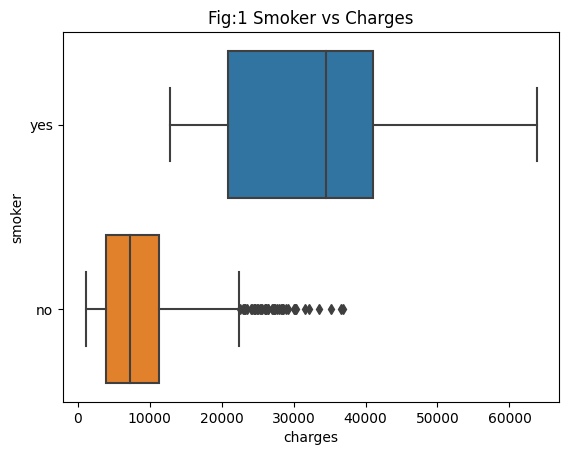

In [27]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

#### Decision criteria

In [28]:
alpha=0.05

#### Evaluation and results

In [29]:
t_value2, p_value2 = stats.ttest_ind(smoker_medical_costs, nonsmoker_medical_costs)
p_value_onetail=p_value2/2
print("t_value2 = ",t_value2, ", p_value2 = ", p_value2, ",p_value_onetail = ", p_value_onetail)

t_value2 =  46.64479459840305 , p_value2 =  1.4067220949376498e-282 ,p_value_onetail =  7.033610474688249e-283


Since p-value is bigger than alpha=0.05, we reject null hypothesis and conclude that people who smoke have higher medical costs.

## Feature Engineering

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [31]:
label_encoder = LabelEncoder()

# Fit label encoder and transform the "sex" column
data['sex'] = label_encoder.fit_transform(data['sex'])

# Fit label encoder and transform the "smoker" column
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# performing one-hot encoding on column region
encoded_regions = pd.get_dummies(data['region'], prefix='region', dtype=int)
data = pd.concat([data.drop(columns=['region']), encoded_regions], axis=1)


In [32]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [33]:
data.corr()['charges'].sort_values()

region_southwest   -0.043637
region_northwest   -0.038695
region_northeast    0.005945
sex                 0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker              0.787234
charges             1.000000
Name: charges, dtype: float64

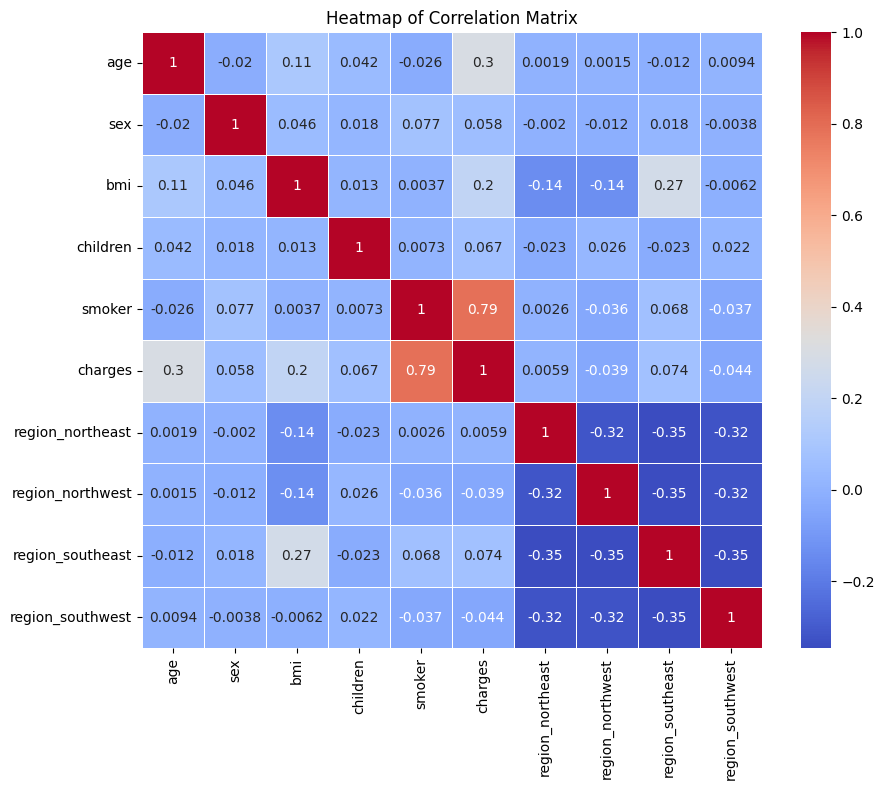

In [34]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Column charges is highly correlated with smoker column. 

In [35]:
#removing the region column due to low correlation with the target column
data = data.drop(["region_southwest", "region_northwest", "region_northeast", "region_southeast"], axis=1)


<Axes: xlabel='charges', ylabel='Density'>

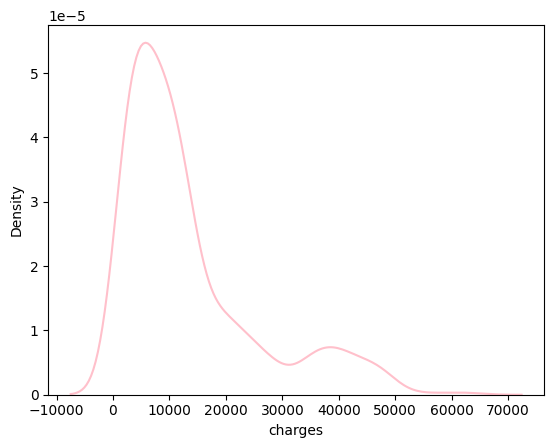

In [36]:
#plot target distribution
sns.distplot(data["charges"],color='pink',hist=False)

In [37]:
# Perform the normality test on target column
normaltest(data.charges.values)

NormaltestResult(statistic=336.4416065386955, pvalue=8.762608303862979e-74)

In [38]:
#normalize column with log function
data['charges'] = np.log(data['charges'])
normaltest(data.charges.values)

NormaltestResult(statistic=52.147628145443655, pvalue=4.745548606594116e-12)

In [39]:
#normalize column with sqrt function
data['charges'] = np.sqrt(data['charges'])
normaltest(data.charges.values)

NormaltestResult(statistic=49.00622896108103, pvalue=2.2826146047072992e-11)

<Axes: xlabel='charges', ylabel='Density'>

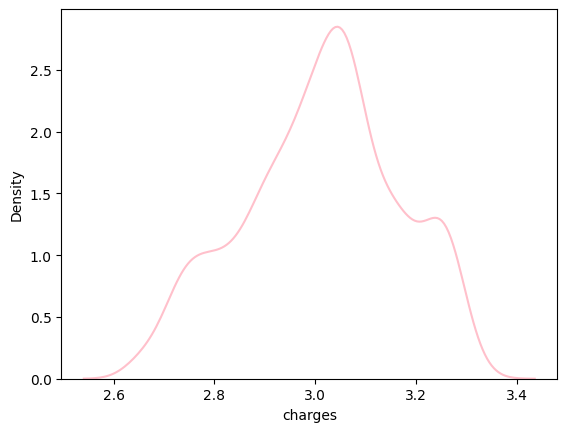

In [40]:
#plot target distribution
sns.distplot(data["charges"],color='pink',hist=False)

For linear regression, it is important that the target column has a normal distribution. It affects the results. We tried several methods, the distribution is still not normal, but it is a little better.


# Model

## Defining input and output

In [41]:
#defining input and target
X = data.drop(['charges'], axis = 1)
y = data.charges

## Scaling features

In [42]:
# Create a StandardScaler object
scaler = StandardScaler()
# Scaling the raw input features
X = scaler.fit_transform(X)

## Split the data

In [43]:
#split the data into the train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

## Linear Regression

In [44]:
# Specify the degree of polynomial features
degree = 3  # Example degree

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [45]:
#train the model
lr = LinearRegression().fit(X_train_poly,y_train)

# Predict charges for the test set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0034902393757838697
R^2 Score: 0.8595786619035255


## Random Forest

In [46]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=123)
rf.fit(X_train, y_train)

# Predict charges for the test set
y_pred = rf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0038841572543800826
R^2 Score: 0.843730328979317


## Ridge regression

In [47]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength)

# Train the model
ridge_reg.fit(X_train_poly, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00349194717611162
R^2 Score: 0.8595099526886538


# Conclude

These results indicate that all regression models is fitting the data well, with relatively low error and a good amount of explained variance. Best results got standard linear regression model with results:

1. Mean Squared Error: 0.0034902393757838697
2. R^2 Score: 0.8595786619035255

- The MSE value of approximately 0.0035 indicates that, on average, the squared difference between predicted and actual values is very small.
- The R² score of approximately 0.86 indicates that about 86% of the variance in the target variable is predictable from the independent variables.

My recommendation is to use the Linear Regression model for prediction, and the Ridge regression model as an alternative. Random Forest showed a negligibly worse result than these two models.